<a href="https://colab.research.google.com/github/mgb9/BDAO_2122/blob/main/Text%20Mining/Text_processing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **1. What is Natural Language Processing (NLP)**

Natural Language Processing (NLP) is broadly defined as the automatic manipulation of natural language, like speech and text, by software. In other words, NLP is an important technique to help understand human language. NLP is a broad topic but we are mainly talking about how to use NLP techniques to do text mining and text analysis. In this tutorial, we will talk about text cleaning and data text processing, which are the essential steps to get data prepared for further text mining.



# **2. Text processing**
Usually, we need to do some proper text cleanning and processing before text mining (e.g. topic modeling). Here are the common steps to follow:

#### **Step 1: Cleaning text**
- (optional) Encoding. Usually you don't need to set up the encoding type or just set it as "utf-8" (which is suitable for all languages), but sometimes if your text data is non-English, you might need to look for the right encoding type. For example, "latin_1" is suitable for the languages in Western Europe and "gbk" for Chinese. Here is the [List of Python standard encodings](https://docs.python.org/3/library/codecs.html#standard-encodings).
- Lower casing;
- Remove special characters, such as emoji;
- Remove email address and url;
- Remove puntuation

#### **Step 2: Tokenisation**
In this step, the text is split into smaller units. Sentence-->words.

#### **Step 3: Remove stop words**
stop words are a set of commonly used words in a language. Example of stop words in English are "is", "a", "the" and etc. These words are usually not useful, so we normally remove them. 

#### **Step 4: Stemming or Lemmatisation**
Stemming is the text standardization step where the words are stemmed or diminished to their root/base form. For example, words like ‘programmer’, ‘programming, ‘program’ will be stemmed to ‘program’. But the disadvantage of stemming is that it stems the words such that its root form loses the meaning or it is not diminished to a proper English word. For example, "manages" will be stemmed to "manag".

Lemmatisation also stems the words but try to make sure the words are not losing their meaning.Lemmatization has a pre-defined dictionary that stores the context of words and checks the word in the dictionary while diminishing. Thus, the words.

We don't need to use both, but which one to choose? It depends. Sometimes stemming works fine then it's more effective. But if we need to get the actual meaning with actual words, then lemmatisation is more suitable.

#### **Step 5: Once the processing are done, put the tokens back together as text**

# **3. Practice with data example**

In [ ]:
# Let's import data first
# Run the code and upload the csv file from your laptop
from google.colab import files
uploaded = files.upload()

Saving Reviews.csv to Reviews.csv


In [ ]:
# once you upload the data to the cloud, you can read the data into dataframe. 
# Remember, if you close the notebook or disconnect, you need to upload the file (run the code above) again before you read data.

import io
import pandas as pd
df = pd.read_csv('Reviews.csv') # change the csv file name to your file name that you uploaded
df.head()

# Our target column is "Review"

,Title,Review,Rating,Date
0,Love this under-all cami tank ?,Originally i bought this in black and white. r...,5,07/06/2018
1,Staple tank!,Love this tank. material and fit are great. lo...,5,01/09/2018
2,Love but also very annoying,"I love this tank, it is so comfortable but it ...",2,30/06/2018
3,"Gorgeous top, straps way too long",I just adore this top! it is so comfy and styl...,4,18/07/2018
4,Great layering piece,This sweater is so comfy and classic - it bala...,5,11/07/2018


## **3.1 Text cleaning**

In [ ]:
# drop data with missing values in the 'Review' column
df = df.dropna(subset=['Review'])

In [ ]:
# convert the relevant column to lowercase
df['Review'] = df.Review.str.lower() 

In [ ]:
# Remove unwanted characters/objects (e.g. url, email, emoji etc.). You don't need to run all of them, but just take the ones suitable for your case.
# import the re library. Re is a built-in python package, which can be used to work with Regular Expressions.
import re


# Remove new line characters ("/n")

df['Review'] = df['Review'].map(lambda x: re.sub('\s+', ' ', x))

# Remove url link
df['Review'] = df['Review'].apply(lambda x: re.split('https:\/\/.*', str(x))[0])

# Remove email address
df['Review'] = df['Review'].map(lambda x: re.sub('\S*@\S*\s?', '', x))

# Remove emoji
# First, build a list of commonly used emojis
emoj = re.compile("["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
        u"\U00002500-\U00002BEF"  # chinese char
        u"\U00002702-\U000027B0"
        u"\U00002702-\U000027B0"
        u"\U000024C2-\U0001F251"
        u"\U0001f926-\U0001f937"
        u"\U00010000-\U0010ffff"
        u"\u2640-\u2642" 
        u"\u2600-\u2B55"
        u"\u200d"
        u"\u23cf"
        u"\u23e9"
        u"\u231a"
        u"\ufe0f"  # dingbats
        u"\u3030"
                      "]+", re.UNICODE)

# Then remove the emoji
df['Review'] = df['Review'].map(lambda x: re.sub(emoj, ' ', x))

# Remove overspace
df['Review'] = df['Review'].map(lambda x: re.sub('\s{2,}', " ", x))

In [ ]:
# Remove punctuation
import string
df['Review'] = df['Review'].map(lambda x: re.sub('[%s]' % re.escape(string.punctuation), ' ', x))

## **3.2 Tokenisation & stop-words removal**

In [ ]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
# create a list of the reviews from the 'Reviews' column
words = df['Review'].tolist()

# tokenise the words
from nltk.tokenize import word_tokenize

word_tokens = [] # create an empty list to put the tokenised words
for review in words:
    word_tokens.append(word_tokenize(review))

word_tokens[0]

['originally',
 'i',
 'bought',
 'this',
 'in',
 'black',
 'and',
 'white',
 'recently',
 'purchased',
 'several',
 'more',
 'in',
 'different',
 'colorways',
 'why',
 'it',
 's',
 'just',
 'perfect',
 'to',
 'wear',
 'as',
 'an',
 'under',
 'tank',
 'cami',
 'i',
 'm',
 'a',
 'busty',
 'gal',
 'and',
 'sometimes',
 'cami',
 'straps',
 'can',
 'be',
 'too',
 'thin',
 'and',
 'dig',
 'into',
 'my',
 'shoulders',
 'this',
 'is',
 'soft',
 'smooth',
 'and',
 'provides',
 'just',
 'enough',
 'coverage',
 'very',
 'flattering',
 'fit',
 'on',
 'its',
 'own',
 'as',
 'well',
 'great',
 'under',
 'loose',
 'knit',
 'or',
 'low',
 'cut',
 'sweaters',
 'love']

In [ ]:
# Start dealing with stopwords
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
from nltk.corpus import stopwords
# use English stopwords
stopwords = stopwords.words("english")
# you can also extend the stopwords list with more words that you want to remove
stopwords.extend(['re'])

# create a new list with stop words removed
tokens_without_stopwords = []
for review in word_tokens:
    tokens_without_stopwords.append([w for w in review if not w in stopwords])

tokens_without_stopwords[0]

['originally',
 'bought',
 'black',
 'white',
 'recently',
 'purchased',
 'several',
 'different',
 'colorways',
 'perfect',
 'wear',
 'tank',
 'cami',
 'busty',
 'gal',
 'sometimes',
 'cami',
 'straps',
 'thin',
 'dig',
 'shoulders',
 'soft',
 'smooth',
 'provides',
 'enough',
 'coverage',
 'flattering',
 'fit',
 'well',
 'great',
 'loose',
 'knit',
 'low',
 'cut',
 'sweaters',
 'love']

## **3.3 Stemming or lemmatisation**

In [ ]:
# option 1: stem the tokens
from nltk.stem import PorterStemmer 
ps = PorterStemmer() 

stemmed = []
for review in tokens_without_stopwords: 
    stemmed.append([ps.stem(w) for w in review])

stemmed[0]

['origin',
 'bought',
 'black',
 'white',
 'recent',
 'purchas',
 'sever',
 'differ',
 'colorway',
 'perfect',
 'wear',
 'tank',
 'cami',
 'busti',
 'gal',
 'sometim',
 'cami',
 'strap',
 'thin',
 'dig',
 'shoulder',
 'soft',
 'smooth',
 'provid',
 'enough',
 'coverag',
 'flatter',
 'fit',
 'well',
 'great',
 'loos',
 'knit',
 'low',
 'cut',
 'sweater',
 'love']

In [ ]:
# option 2: lemmatise the tokens

nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


True

In [ ]:
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()

# The lemmatizer requires the correct POS tag to be accurate, if you use the default settings of the WordNetLemmatizer.lemmatize(), the default tag is noun.
# Which means the words other than noun would not be lemmatised, and this is not what we expect.
# Therefore we need to define the POS tags ('n' for nouns(default), 'a' for adj, 'v' for verb, 'r' for adverb) which are allowed to be lemmatised.

lemmatised = []
for review in tokens_without_stopwords: 
  n_lemmatised = [lemmatizer.lemmatize(w) for w in review]
  v_lemmatised = [lemmatizer.lemmatize(w,'v') for w in n_lemmatised]
  r_lemmatised = [lemmatizer.lemmatize(w,'r') for w in v_lemmatised]
  a_lemmatised = [lemmatizer.lemmatize(w,'a') for w in r_lemmatised]
  lemmatised.append(a_lemmatised) # here noun, adj, verb, adv are the POS tags that we allowed

lemmatised[0]

['originally',
 'buy',
 'black',
 'white',
 'recently',
 'purchase',
 'several',
 'different',
 'colorways',
 'perfect',
 'wear',
 'tank',
 'cami',
 'busty',
 'gal',
 'sometimes',
 'cami',
 'strap',
 'thin',
 'dig',
 'shoulder',
 'soft',
 'smooth',
 'provide',
 'enough',
 'coverage',
 'flat',
 'fit',
 'well',
 'great',
 'loose',
 'knit',
 'low',
 'cut',
 'sweater',
 'love']

In [ ]:
# put the tokens back together as text after stemming
import string
rejoin = []
for review in stemmed: 
    x = " ".join(review) # join the text back together 
    # remove punctuation from the reviews using the string package
    rejoin.append(x)

# add the reformed text to the data frame    
df['filtered_review'] = rejoin

In [ ]:
# put the tokens back together as text after lemmatisation
import string
rejoin_2 = []
for review in lemmatised: # Here we choose to use stemming instead of lemmatisation
    x = " ".join(review) # join the text back together 
    # remove punctuation from the reviews using the string package
    rejoin_2.append(x)

# add the reformed text to the data frame    
df['filtered_review_2'] = rejoin_2

In [ ]:
df.head() # new columns are added to the original data

,Title,Review,Rating,Date,filtered_review,filtered_review_2
0,Love this under-all cami tank ?,originally i bought this in black and white r...,5,07/06/2018,origin bought black white recent purchas sever...,originally buy black white recently purchase s...
1,Staple tank!,love this tank material and fit are great lo...,5,01/09/2018,love tank materi fit great love revers highli ...,love tank material fit great love reversible h...
2,Love but also very annoying,i love this tank it is so comfortable but it ...,2,30/06/2018,love tank comfort flaw roll everi time walk an...,love tank comfortable flaw roll every time wal...
3,"Gorgeous top, straps way too long",i just adore this top it is so comfy and styl...,4,18/07/2018,ador top comfi stylish wear littl purpl cardig...,adore top comfy stylish wear little purple car...
4,Great layering piece,this sweater is so comfy and classic it bala...,5,11/07/2018,sweater comfi classic balanc quirki hand knit ...,sweater comfy classic balance quirky hand knit...


# **4. Basic text analysis**

## **4.1 POS Tagging**
Part-of-Speech Tagging (POS tagging) is the process of marking up a word in a text (corpus) as corresponding to a particular part of speech based on both its definition and its context. To put it simple, POS tagging help us mark up a word as nouns, verbs, adjectives or adverbs. We can also extract specific type of words based on what we need.

In [ ]:
# Before running the module, we need to download some packages and list of tags available in nltk
nltk.download('tagsets')
print(nltk.help.upenn_tagset())

nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package tagsets to /root/nltk_data...
[nltk_data]   Unzipping help/tagsets.zip.
$: dollar
    $ -$ --$ A$ C$ HK$ M$ NZ$ S$ U.S.$ US$
'': closing quotation mark
    ' ''
(: opening parenthesis
    ( [ {
): closing parenthesis
    ) ] }
,: comma
    ,
--: dash
    --
.: sentence terminator
    . ! ?
:: colon or ellipsis
    : ; ...
CC: conjunction, coordinating
    & 'n and both but either et for less minus neither nor or plus so
    therefore times v. versus vs. whether yet
CD: numeral, cardinal
    mid-1890 nine-thirty forty-two one-tenth ten million 0.5 one forty-
    seven 1987 twenty '79 zero two 78-degrees eighty-four IX '60s .025
    fifteen 271,124 dozen quintillion DM2,000 ...
DT: determiner
    all an another any both del each either every half la many much nary
    neither no some such that the them these this those
EX: existential there
    there
FW: foreign word
    gemeinschaft hund ich jeux habeas Haementeria Herr K'ang-si vous
    lutihaw alai je j

True

In [ ]:
from nltk import pos_tag, RegexpParser

# Here we define the tags for each word in the token list
tags = []
for i in range(len(word_tokens)): # here we use the tokenised words from the review without removing stopwords or stemming or lemmatisation because POS tagging needs to consider the context
    tags.append(pos_tag(word_tokens[i]))

tags[0]


[('originally', 'RB'),
 ('i', 'JJ'),
 ('bought', 'VBD'),
 ('this', 'DT'),
 ('in', 'IN'),
 ('black', 'JJ'),
 ('and', 'CC'),
 ('white', 'JJ'),
 ('recently', 'RB'),
 ('purchased', 'VBD'),
 ('several', 'JJ'),
 ('more', 'RBR'),
 ('in', 'IN'),
 ('different', 'JJ'),
 ('colorways', 'NNS'),
 ('why', 'WRB'),
 ('it', 'PRP'),
 ('s', 'VBZ'),
 ('just', 'RB'),
 ('perfect', 'JJ'),
 ('to', 'TO'),
 ('wear', 'VB'),
 ('as', 'IN'),
 ('an', 'DT'),
 ('under', 'IN'),
 ('tank', 'NN'),
 ('cami', 'NN'),
 ('i', 'NN'),
 ('m', 'VBP'),
 ('a', 'DT'),
 ('busty', 'JJ'),
 ('gal', 'NN'),
 ('and', 'CC'),
 ('sometimes', 'RB'),
 ('cami', 'JJ'),
 ('straps', 'NNS'),
 ('can', 'MD'),
 ('be', 'VB'),
 ('too', 'RB'),
 ('thin', 'JJ'),
 ('and', 'CC'),
 ('dig', 'NN'),
 ('into', 'IN'),
 ('my', 'PRP$'),
 ('shoulders', 'NNS'),
 ('this', 'DT'),
 ('is', 'VBZ'),
 ('soft', 'JJ'),
 ('smooth', 'NNS'),
 ('and', 'CC'),
 ('provides', 'VBZ'),
 ('just', 'RB'),
 ('enough', 'JJ'),
 ('coverage', 'NN'),
 ('very', 'RB'),
 ('flattering', 'JJ'),
 ('fit',

In [ ]:
# Here we extract the nouns from the tokens, added to list
noun = []
for i in range(len(word_tokens)): # here we use the tokenised words from the review without removing stopwords or stemming or lemmatisation because POS tagging needs to consider the context
    noun.append([word for word,pos in pos_tag(word_tokens[i]) if pos.startswith('N')])

noun[0]

['colorways',
 'tank',
 'cami',
 'i',
 'gal',
 'straps',
 'dig',
 'shoulders',
 'smooth',
 'coverage',
 'fit',
 'knit',
 'cut',
 'sweaters']

In [ ]:
# Here we extract the adjective from the tokens, added to list
adj = []
for i in range(len(word_tokens)): # here we use the tokenised words from the review without removing stopwords or stemming or lemmatisation because POS tagging needs to consider the context
    adj.append([word for word,pos in pos_tag(word_tokens[i]) if pos == 'JJ'])

adj[0]

['i',
 'black',
 'white',
 'several',
 'different',
 'perfect',
 'busty',
 'cami',
 'thin',
 'soft',
 'enough',
 'flattering',
 'own',
 'great',
 'loose',
 'low']

##### **Notes:**
By POS Tagging, we can understand what types of words are in each review. And this allows us to extract only noun or only adjective, so we can better categorize the words and do further analysis. For example, we can extract specific type of words to check the frequency of words (e.g. nouns usually give more information about what). This is not a required step in the text processing, but it can be a tool for text analysis. 

(POS tagging by nltk is not 100% accurate, so it's common if you see some words are not allocated with right tags.)

## **4.2 Text vectorisation**

Text Vectorisation is the process of converting text into numerical representation. Once we convert text into numbers, then they can be usable features to be put into models. And with numbers we can do more further analysis and interpretation of the data as well.

Here we are introducing two methods of verctorisation:
- Term Document Matrix: create a binary vector where each index denotes the presence or absence of a word;
- Term Frequency-Inverse Document Frequency: weight each word by some form of importance score as well when creating term document matrix.

In [ ]:
# For creating Term Document Matrix (DTM), CountVectorizer() from scikit-learn
from sklearn.feature_extraction.text import CountVectorizer

# set vectorizer - CountVectorizer for word counts
vectorizer = CountVectorizer()

# create an array of word counts
doc_vec = vectorizer.fit_transform(df.filtered_review)

# convert this to a dataframe
df2 = pd.DataFrame(doc_vec.toarray(), columns=vectorizer.get_feature_names())

# set a threshold to drop infrequent words
threshold = 0.1

# drop words based on the threshold
df2 = df2.drop(df2.mean()[df2.mean() < threshold].index.values, axis=1) # Here find out the word with average word count lower than 0.1 and drop them

# join the two datasets together
dtm = df.join(df2, how='left')

# write the dataframe out to csv and download
dtm.to_csv('dtm.csv',index=False)
files.download('dtm.csv')

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
# We can use the same process to creat document term matrix by considering the importance of the words
# Here we will use TfidfVectorizer() from scikit-learn to convert a collection of raw documents to a matrix of TF-IDF features.
from sklearn.feature_extraction.text import TfidfVectorizer

# set vectorizer - CountVectorizer for word counts
tfidfvectorizer = TfidfVectorizer()

# create an array of word counts
vec = tfidfvectorizer.fit_transform(df.filtered_review)

# convert this to a dataframe
df3 = pd.DataFrame(vec.toarray(), columns=tfidfvectorizer.get_feature_names())

# set a threshold to drop infrequent words
threshold = 0.1

# drop words based on the threshold
df3 = df3.drop(df3.mean()[df3.mean() < threshold].index.values, axis=1) # Here find out the word with average word count lower than 0.1 and drop them

# join the two datasets together
tfidf = df.join(df3, how='left')

# write the dataframe out to csv and download
tfidf.to_csv('tfidf.csv',index=False)
files.download('tfidf.csv')

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## **4.3 Visualisation based on the matrix**

In [ ]:
def get_top_n_words(corpus, n=None):
    """
    List the top n words in a vocabulary according to occurrence in a text corpus.
    
    get_top_n_words(["I love Python", "Python is a language programming", "Hello world", "I love the world"]) -> 
    [('python', 2),
     ('world', 2),
     ('love', 2),
     ('hello', 1),
     ('is', 1),
     ('programming', 1),
     ('the', 1),
     ('language', 1)]
    """
    vec = CountVectorizer().fit(corpus) # you can also change it to tfidfvectorizer, then you are looking for top words based on tf-idf
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

top_10_words = get_top_n_words(df['filtered_review'], 10)
for word, freq in top_10_words:
    print(word, freq)

top 3326
size 2552
love 2476
fit 2385
look 2000
wear 1842
like 1748
color 1537
great 1299
would 1188


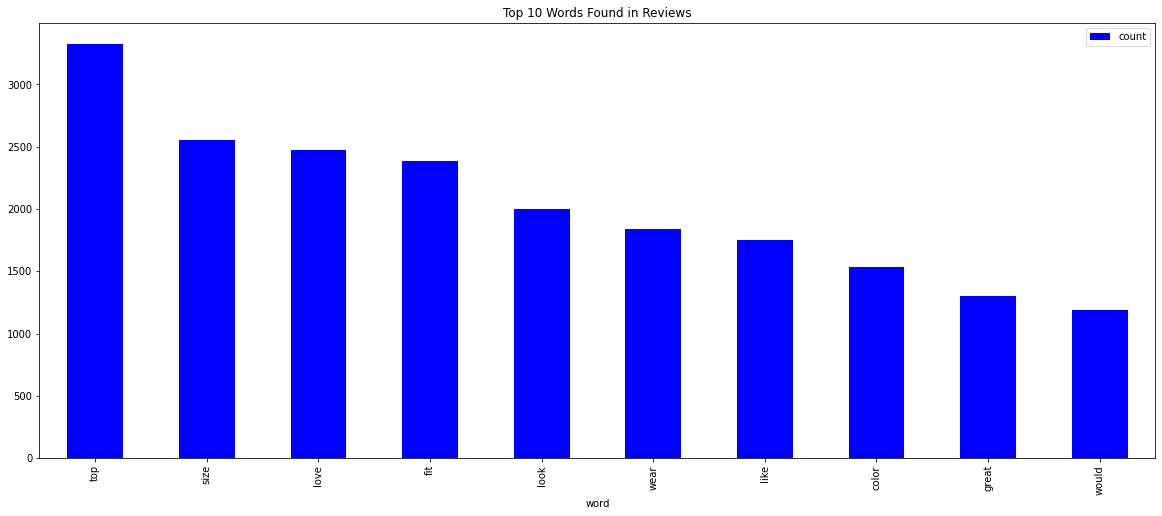

In [ ]:
import matplotlib.pyplot as plt
top10_df = pd.DataFrame(top_10_words, columns=['word', 'count'])

fig, ax = plt.subplots(figsize=(20, 8))
# Plot horizontal bar graph
top10_df.plot.bar(x='word',y='count',ax=ax,color="blue")

ax.set_title("Top 10 Words Found in Reviews")

plt.show()

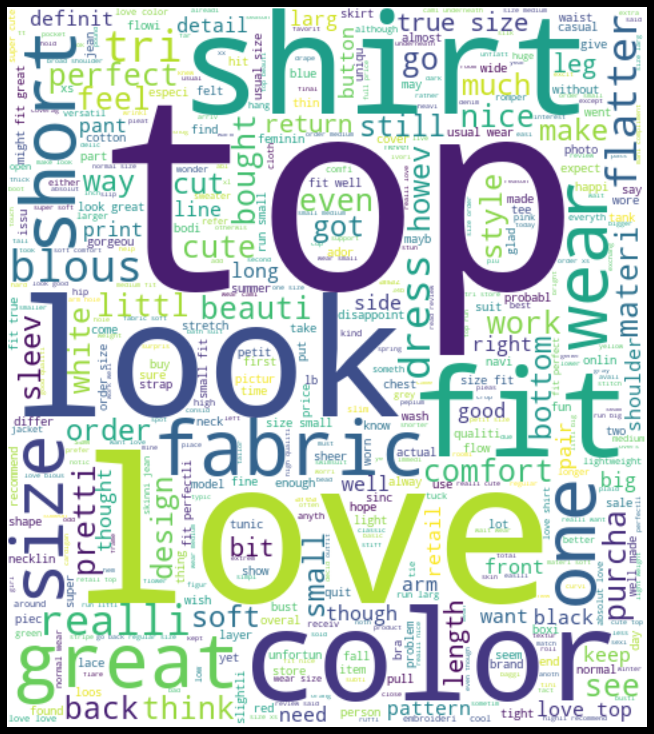

In [ ]:
from wordcloud import WordCloud
from sklearn.feature_extraction import text

long_string = ' '.join(list(df['filtered_review']))
wordcloud = WordCloud(width = 480, height = 540, background_color= 'white', max_words=500, contour_width=3, contour_color= 'steelblue').generate(long_string)
plt.figure(figsize=(20,10),facecolor ='k')
plt.imshow(wordcloud, interpolation ='bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()